Euler's Method
      t         Sx        Sy         Vx         Vy       DSx       DSy  \
0   0.0   0.000000  0.000000  14.142136  14.142136  0.000000  0.000000   
1   0.0   1.414214  1.414214  13.435029  12.454029  1.414214  1.414214   
2   0.1   2.757716  2.659616  12.763277  10.850327  1.343503  1.245403   
3   0.2   4.034044  3.744649  12.125114   9.326811  1.276328  1.085033   
4   0.3   5.246556  4.677330  11.518858   7.879470  1.212511  0.932681   
5   0.4   6.398441  5.465277  10.942915   6.504497  1.151886  0.787947   
6   0.5   7.492733  6.115727  10.395769   5.198272  1.094291  0.650450   
7   0.6   8.532310  6.635554   9.875981   3.957359  1.039577  0.519827   
8   0.7   9.519908  7.031290   9.382182   2.778491  0.987598  0.395736   
9   0.8  10.458126  7.309139   8.913073   1.658566  0.938218  0.277849   
10  0.9  11.349433  7.474996   8.467419   0.594638  0.891307  0.165857   
11  1.0  12.196175  7.534460   8.044048  -0.416094  0.846742  0.059464   
12  1.1  13.000580  7.4

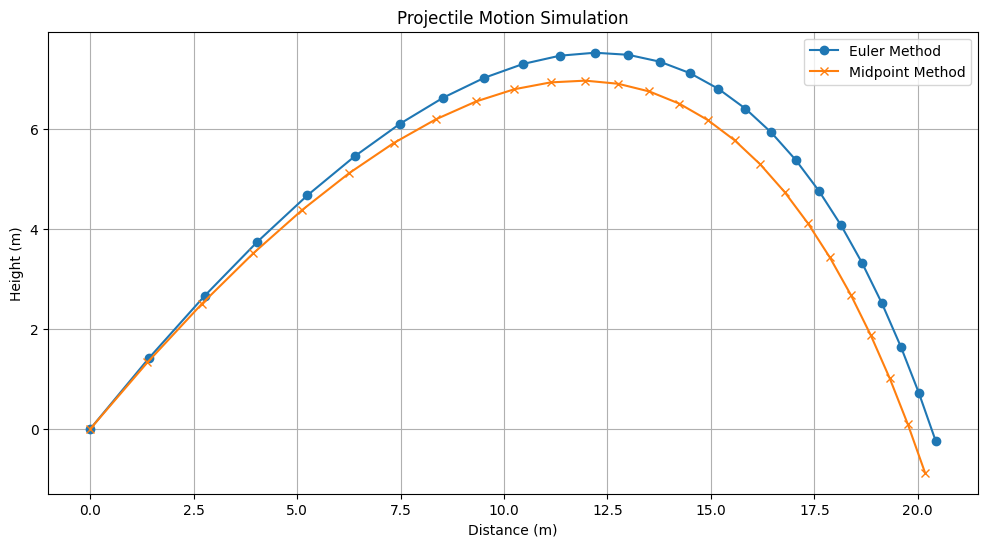

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
m = 1.0   # mass (kg)
g = -9.81  # gravity (m/s^2)
k = 0.5  # drag coefficient
dt = 0.1  # time step (s)
duration = 5  # duration of simulation (s)

# Initial conditions
v0 = 20.0  # initial velocity (m/s)
angle = 45.0  # launch angle (degrees)

v0x = v0 * np.cos(np.radians(angle))  # initial horizontal velocity
v0y = v0 * np.sin(np.radians(angle))  # initial vertical velocity
s0 = np.array([0, 0])  # initial position (x, y)

time = 0


def euler_method(v0x, v0y, s0, dt, time, k, m, g):
    vx, vy = v0x, v0y
    sx, sy = s0
    results = [(0, s0[0], s0[1], v0x, v0y, 0, 0, -k*v0x, m*g-k*v0y, -k*v0x/m, (m*g-k*v0y)/m, 0, 0)]  # Initial conditions
    while time < duration:
        # Calculate the drag force in both x and y directions
        Fx = -k * vx
        Fy = m * g - k * vy

        # Compute the acceleration in both x and y directions
        ax = Fx / m
        ay = Fy / m

        # Calculate change in velocity for both x and y directions
        DVx = ax * dt
        DVy = ay * dt

        # Calculate change in position for both x and y directions
        DSx = vx * dt
        DSy = vy * dt

        # Update position and velocities for the next iteration
        sx += DSx
        sy += DSy
        vx += DVx
        vy += DVy

        results.append((time, sx, sy, vx, vy, DSx, DSy, Fx, Fy, ax, ay, DVx, DVy))
        time += dt
        if sy < 0:
            break
    return results


def midpoint_method(v0x, v0y, s0, dt, time, k, m, g):
    vx, vy = v0x, v0y
    sx, sy = s0
    results = [(0, s0[0], s0[1], v0x, v0y, 0, 0, -k * v0x, m * g - k * v0y, -k * v0x / m, (m * g - k * v0y) / m, 0, 0)]  # Initial conditions
    while time < duration:
        # Initial Euler step to estimate midpoint velocity
        Fx = -k * vx
        Fy = m * g - k * vy
        ax = Fx / m
        ay = Fy / m
        mid_vx = vx + ax * dt / 2
        mid_vy = vy + ay * dt / 2

        # Calculate forces, accelerations, and deltas at the midpoint
        mid_Fx = -k * mid_vx
        mid_Fy = m * g - k * mid_vy
        mid_ax = mid_Fx / m
        mid_ay = mid_Fy / m
        DVx = mid_ax * dt
        DVy = mid_ay * dt
        DSx = mid_vx * dt
        DSy = mid_vy * dt

        # Update position and velocity using midpoint values
        sx += DSx
        sy += DSy
        vx += DVx
        vy += DVy

        results.append((time, sx, sy, vx, vy, DSx, DSy, mid_Fx, mid_Fy, mid_ax, mid_ay, DVx, DVy))
        time += dt
        if sy < 0:
            break
    return results


# Perform the simulations
simulation_results = euler_method(v0x, v0y, s0, dt, time, k, m, g)
midpoint_simulation_results = midpoint_method(v0x, v0y, s0, dt, time, k, m, g)

# Convert results to a structured format
simulation_df = pd.DataFrame(simulation_results, columns=['t', 'Sx', 'Sy', 'Vx', 'Vy', 'DSx', 'DSy', 'Fx', 'Fy', 'ax', 'ay', 'DVx', 'DVy'])
midpoint_simulation_df = pd.DataFrame(midpoint_simulation_results, columns=['t', 'Sx', 'Sy', 'Vx', 'Vy', 'DSx', 'DSy', 'Fx', 'Fy', 'ax', 'ay', 'DVx', 'DVy'])

# Display the DataFrame
print("Euler's Method")
print(simulation_df)
print("\n")
print("Midpoint Method")
print(midpoint_simulation_df)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(simulation_df['Sx'], simulation_df['Sy'], label='Euler Method', marker='o')
plt.plot(midpoint_simulation_df['Sx'], midpoint_simulation_df['Sy'], label='Midpoint Method', marker='x')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion Simulation')
plt.legend()
plt.grid(True)
plt.show()